# Lending Club Case Study

# Overview - Business Understanding

You work for a **consumer finance company** which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two **types of risks** are associated with the bank’s decision:

- If the applicant is **likely to repay the loan**, then not approving the loan results in a loss of business to the company

- If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of default.

<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1'>
<center> <b>Figure 1. Loan Data Set</b> </center> 
 </br>  
</p>

When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

- **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
    - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

# IMPORT LIBRARIES AND DATASETS

In [1020]:
# import package
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics

%matplotlib inline
sns.set()


## Data Loading and Description

- **Loan Data Set** - It contains the complete loan data for all loans issued through the time period 2007 to 2011.
- **Data Dictionary** - You can access the data dictionary which describes the meaning of these variables from the provided link below:

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end.

Let us check the basic information of the dataset. The very basic information to know is the dimension of the dataset – rows and columns – that’s what we find out with the method shape.

In [1021]:
# Load Data
df_loan = pd.read_csv('Data/loan.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1022]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [1023]:
df_loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1024]:
# Check how many row & columns available in both dataset
df_loan.shape

(39717, 111)

loan dataset has __39717 rows and 111 columns.__

In [1025]:
# Get info from both data set to understand data in depths 
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1026]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


- The dataset contains details information related to the Customers loans application such as loan amount, funded amount, interest rate, grade, etc. between 2007 and 2011.
- The dataset comprises of __39717 observations of 111 columns__. Above is a table showing names of all the columns and their description.
- There are few columns have all and/or some NULL/NaN values that either need to drop or fill some value

# Utils functions

In [1027]:
def findColumnWithNA():
    result = len(df_loan.columns[df_loan.isna().all()])
    print("{} columns having null values".format(result))

In [1028]:
def findColumnWithAtleastOneNA():
    result = len(df_loan.columns[df_loan.isna().any()])
    print("{} columns having at least null values".format(result))

In [1029]:
def findColumnWithoutNA():
    result = len(df_loan.columns[df_loan.notna().all()])
    print("{} columns having other than null values".format(result))

In [1030]:
def describeDataSet():
    print("We are having {} columns in the loan dataframe, out of which ".format(len(df_loan.columns)))
    findColumnWithNA()
    findColumnWithAtleastOneNA()
    findColumnWithoutNA()

In [1031]:
def getUniqueValues(df):
    for (columnName, columnData) in df.iteritems():
        print('\n Colunm Name : ', columnName)
        print(' Column Contents : ', columnData.unique())

In [1032]:
def getUniqueValuesWithNaN(df):
    columns_name = df.columns[df.isnull().any()].tolist()
    print(columns_name)
    for column_name in columns_name:
        print('\n Colunm Name : ', column_name)
        print(' Column Contents : ', df[column_name].unique())
        print(' Column Contents counts : ', df[column_name].nunique())

In [1033]:
def isNullValuePresentInDataset(df):
    result = df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]
    result.sort_values(ascending=False)
    print(result)

## DATA CLEANUP

In [1034]:
# describeDataSet before delete Columns with NA value
describeDataSet()

We are having 111 columns in the loan dataframe, out of which 
54 columns having null values
68 columns having at least null values
43 columns having other than null values


We are having 54 Columns with null values that we need to removes all from the datasets

In [1035]:
df_loan = df_loan.drop(df_loan.columns[df_loan.isna().sum()>len(df_loan.columns)],axis = 1)

# We can drop row which having at least null value
# df_loan = df_loan.dropna(axis = 0).reset_index(drop=True)

In [1036]:
# describeDataSet after delete Columns with NA value
describeDataSet()

We are having 50 columns in the loan dataframe, out of which 
0 columns having null values
7 columns having at least null values
43 columns having other than null values


Get all columns which having at lest one null/NaN values

In [1037]:
isNullValuePresentInDataset(df_loan)

title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
tax_liens                     0.098195
dtype: float64


In [1038]:
getUniqueValuesWithNaN(df_loan)

['title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']

 Colunm Name :  title
 Column Contents :  ['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']
 Column Contents counts :  19615

 Colunm Name :  revol_util
 Column Contents :  ['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
 Column Contents counts :  1089

 Colunm Name :  last_pymnt_d
 Column Contents :  ['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Aug-14' 'Oct-14'
 'Aug-12' 'Jul-14' 'Jul-13' 'Jan-16' 'Feb-16' 'Apr-15' 'Feb-14' 'Sep-14'
 'Jun-12' 'Feb-13' 'Mar-13' 'May-14' 'Mar-15' 'Jan-13' 'Dec-13' 'Feb-12'
 'Mar-14' 'Sep-15' 'Nov-15' 'Mar-16' 'Jan-12' 'Oct-15' 'Nov-14' 'Mar-12'
 'May-12' 'Apr-16' 'Dec-15' 'Jun-15' 'May-15' 'Jul-15' 'Dec

In [1039]:
df_loan.collections_12_mths_ex_med.describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [1040]:
df_loan.chargeoff_within_12_mths.describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [1041]:
df_loan.tax_liens.describe()

count    39678.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

Since there are zero values in chargeoff_within_12_mths, chargeoff_within_12_mths & tax_liens columns, we can drop those columns.

In [1042]:
df_loan = df_loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens' ],axis = 1)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0


In [1043]:
# describeDataSet after delete Columns with NA value
describeDataSet()

We are having 47 columns in the loan dataframe, out of which 
0 columns having null values
4 columns having at least null values
43 columns having other than null values


In [1044]:
isNullValuePresentInDataset(df_loan)

title                 0.027696
revol_util            0.125891
last_pymnt_d          0.178765
last_credit_pull_d    0.005036
dtype: float64


In [1045]:
getUniqueValuesWithNaN(df_loan)

['title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']

 Colunm Name :  title
 Column Contents :  ['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']
 Column Contents counts :  19615

 Colunm Name :  revol_util
 Column Contents :  ['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
 Column Contents counts :  1089

 Colunm Name :  last_pymnt_d
 Column Contents :  ['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Aug-14' 'Oct-14'
 'Aug-12' 'Jul-14' 'Jul-13' 'Jan-16' 'Feb-16' 'Apr-15' 'Feb-14' 'Sep-14'
 'Jun-12' 'Feb-13' 'Mar-13' 'May-14' 'Mar-15' 'Jan-13' 'Dec-13' 'Feb-12'
 'Mar-14' 'Sep-15' 'Nov-15' 'Mar-16' 'Jan-12' 'Oct-15' 'Nov-14' 'Mar-12'
 'May-12' 'Apr-16' 'Dec-15' 'Jun-15' 'May-15' 'Jul-15' 'Dec-11' 'Nov-11'
 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11' 'A

Remove '%' from revol_utls columns & then replace null/NaN value with median value.
There are multiple way to implement this, please check below options which we consider for this task

In [1046]:
# Option - 1
# split value so that we can have plan value in new column & delete old column
# df_loan['revol_util_percentage'] = df_loan['revol_util'].str.rstrip('%')
# del df_loan['revol_util']

# then  fill NA value with median
# df_loan['revol_util_percentage'] = df_loan['revol_util_percentage'].fillna(df_loan['revol_util_percentage'].median())

In [1047]:
# Option - 2
# split value so that we can have plan value in new column & delete old column
df_loan['revol_util_percentage'] = df_loan.revol_util.apply(lambda x : str(x).split('%')[0])
del df_loan['revol_util']

# then  fill NA value with median
df_loan['revol_util_percentage'] = df_loan['revol_util_percentage'].fillna(df_loan['revol_util_percentage'].median())

In [1048]:
df_loan.revol_util_percentage.unique()

array(['83.70', '9.40', '98.50', ..., '49.63', '0.04', '7.28'],
      dtype=object)

We also need to remove '%' from int_rate columns 

In [1049]:
df_loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1050]:
df_loan['term_in_months'] = df_loan['term'].str.rstrip('months')
del df_loan['term']

In [1051]:
df_loan['int_rate'].unique()[:5]

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%'], dtype=object)

In [1052]:
df_loan['int_rate_percentage'] = df_loan['int_rate'].str.rstrip('%')
del df_loan['int_rate']

In [1053]:
df_loan['issue_d_month'], df_loan['issue_d_year'] = df_loan['issue_d'].str.split('-').str

df_loan['last_credit_pull_d_month'], df_loan['last_credit_pull_d_year'] = df_loan['last_credit_pull_d'].str.split('-').str

df_loan['last_pymnt_d_month'], df_loan['last_pymnt_d_year'] = df_loan['last_pymnt_d'].str.split('-').str

df_loan['earliest_cr_line_month'], df_loan['earliest_cr_line_year'] = df_loan['earliest_cr_line'].str.split('-').str

<ipython-input-1053-f222600e2d4f>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan['issue_d_month'], df_loan['issue_d_year'] = df_loan['issue_d'].str.split('-').str
<ipython-input-1053-f222600e2d4f>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan['last_credit_pull_d_month'], df_loan['last_credit_pull_d_year'] = df_loan['last_credit_pull_d'].str.split('-').str
<ipython-input-1053-f222600e2d4f>:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan['last_pymnt_d_month'], df_loan['last_pymnt_d_year'] = df_loan['last_pymnt_d'].str.split('-').str
<ipython-input-1053-f222600e2d4f>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_loan['earliest_cr_line_month'], df_loan['earliest_cr_line_year'] = df_loan['earliest_cr_line'].str.split('-').str


In [1054]:
df_loan['issue_d_year'] = '20' + df_loan['issue_d_year']


Drop columns from which we have derived new columns


In [1055]:
del df_loan['issue_d']
del df_loan['last_credit_pull_d']
del df_loan['last_pymnt_d']
del df_loan['earliest_cr_line']

In [1056]:
getUniqueValues(df_loan)


 Colunm Name :  id
 Column Contents :  [1077501 1077430 1077175 ...   90395   90376   87023]

 Colunm Name :  member_id
 Column Contents :  [1296599 1314167 1313524 ...   90390   89243   86999]

 Colunm Name :  loan_amnt
 Column Contents :  [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  99

In [1057]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,...,term_in_months,int_rate_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,RENT,24000.0,...,36,10.65,Dec,2011,May,16,Jan,15,Jan,85
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,RENT,30000.0,...,60,15.27,Dec,2011,Sep,13,Apr,13,Apr,99
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,RENT,12252.0,...,36,15.96,Dec,2011,May,16,Jun,14,Nov,01
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,RENT,49200.0,...,36,13.49,Dec,2011,Apr,16,Jan,15,Feb,96
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,RENT,80000.0,...,60,12.69,Dec,2011,May,16,May,16,Jan,96


In [1058]:
df_loan.shape

(39717, 51)

In [1059]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   installment               39717 non-null  float64
 6   grade                     39717 non-null  object 
 7   sub_grade                 39717 non-null  object 
 8   home_ownership            39717 non-null  object 
 9   annual_inc                39717 non-null  float64
 10  verification_status       39717 non-null  object 
 11  loan_status               39717 non-null  object 
 12  pymnt_plan                39717 non-null  object 
 13  url                       39717 non-null  object 
 14  purpos

In [1060]:
describeDataSet()

We are having 51 columns in the loan dataframe, out of which 
0 columns having null values
5 columns having at least null values
46 columns having other than null values


In [1061]:
getUniqueValuesWithNaN(df_loan)

['title', 'last_credit_pull_d_month', 'last_credit_pull_d_year', 'last_pymnt_d_month', 'last_pymnt_d_year']

 Colunm Name :  title
 Column Contents :  ['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']
 Column Contents counts :  19615

 Colunm Name :  last_credit_pull_d_month
 Column Contents :  ['May' 'Sep' 'Apr' 'Jan' 'Dec' 'Aug' 'Mar' 'Nov' 'Jul' 'Feb' 'Jun' 'Oct'
 nan]
 Column Contents counts :  12

 Colunm Name :  last_credit_pull_d_year
 Column Contents :  ['16' '13' '14' '12' '15' '11' '10' nan '07' '09' '08']
 Column Contents counts :  10

 Colunm Name :  last_pymnt_d_month
 Column Contents :  ['Jan' 'Apr' 'Jun' 'May' 'Nov' 'Sep' 'Jul' 'Oct' 'Feb' 'Aug' nan 'Dec'
 'Mar']
 Column Contents counts :  12

 Colunm Name :  last_pymnt_d_year
 Column Contents :  ['15' '13' '14' '16' '12' nan '11' '10' '09' '08']
 Column Contents counts :  9


In [1062]:
isNullValuePresentInDataset(df_loan)

title                       0.027696
last_credit_pull_d_month    0.005036
last_credit_pull_d_year     0.005036
last_pymnt_d_month          0.178765
last_pymnt_d_year           0.178765
dtype: float64


We have drop few value & fill NA with median value in some columns though after derive new value in new columns having minor NA value available, we can drop that 

In [1063]:
# We can drop row which having at least null value
df_loan = df_loan.dropna(axis = 0).reset_index(drop=True)

In [1064]:
isNullValuePresentInDataset(df_loan)

Series([], dtype: float64)


Now we have handle NA value in dataset by removing & fill with median values. Let's move to next step

# Check Outlier in Dataset

In [1065]:
df_loan['annual_inc'].describe()

count    3.963300e+04
mean     6.901247e+04
std      6.384216e+04
min      4.000000e+03
25%      4.050000e+04
50%      5.900000e+04
75%      8.240400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [1066]:
# change annual income in lakhs
df_loan['annual_inc'] = df_loan['annual_inc'] / 1000

In [1067]:
df_loan['annual_inc'].describe()

count    39633.000000
mean        69.012465
std         63.842156
min          4.000000
25%         40.500000
50%         59.000000
75%         82.404000
max       6000.000000
Name: annual_inc, dtype: float64

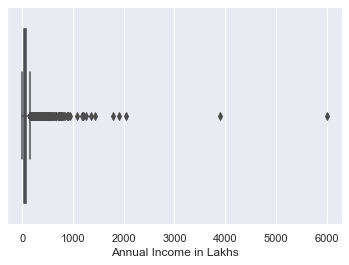

In [1068]:
sns.boxplot(x=df_loan['annual_inc'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

There are many applicants having annual income of more than 10 lakhs which we can say a outlier in dataset with references of above boxplot fig. 

Let's see what result we can get by the quantile info and based on that we can take an appropriate action.
The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
So, considering threshold for removing outliers as 0.95

In [1069]:
quantile_info = df_loan['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59.00000
0.75     82.40400
0.90    116.00000
0.95    142.00000
0.97    166.00000
0.98    188.36256
0.99    235.00000
Name: annual_inc, dtype: float64

In [1070]:
annual_inc_with_quantile = df_loan['annual_inc'].quantile(0.95)
df_loan = df_loan[df_loan.annual_inc <= annual_inc_with_quantile]

Now check annual income with latest data to see outlier treatment 

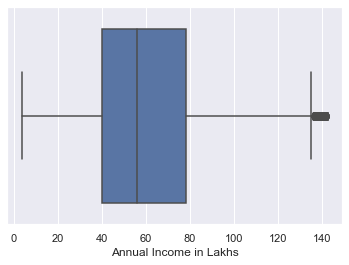

In [1071]:
sns.boxplot(x=df_loan['annual_inc'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

**There are couple of applicants having annual income of more than 140 lakhs**

Let's check other numeric variable in dataset for outliers i.e. dti, loan_amnt, funded_amnt_inv

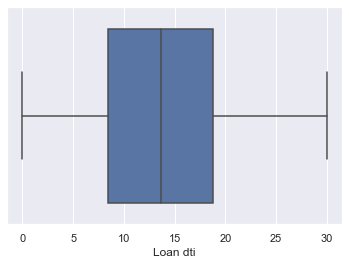

In [1072]:
sns.boxplot(x=df_loan.dti)
plt.xlabel('Loan dti')
plt.show()

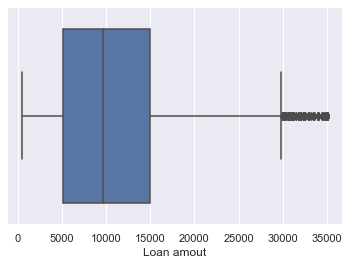

In [1073]:
sns.boxplot(x=df_loan.loan_amnt)
plt.xlabel('Loan amout')
plt.show()

In [1074]:
df_loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20500.0
0.950    25000.0
0.970    27000.0
0.975    29000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

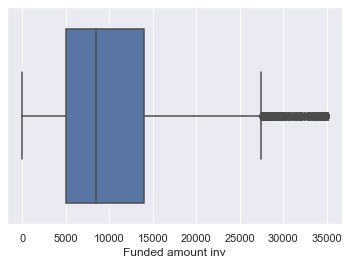

In [1075]:
sns.boxplot(x=df_loan.funded_amnt_inv)
plt.xlabel('Funded amount inv')
plt.show()

In [1076]:
df_loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8500.000000
0.750    13975.000000
0.900    19925.000000
0.950    24000.000000
0.970    25000.000000
0.975    26344.140955
0.980    28200.000000
0.985    29975.000000
0.990    33155.145879
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

# Derive Data

Let's try to create new derive data by binning the existing meaningful data for our analysis

In [1077]:
df_loan['open_acc_groups'] = pd.cut(df_loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
df_loan['total_acc_groups'] = pd.cut(df_loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
df_loan['annual_inc_groups'] = pd.cut(df_loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
df_loan['installment_groups'] = pd.cut(df_loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df_loan['funded_amnt_inv_group'] = pd.cut(df_loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
df_loan['loan_amnt_groups'] = pd.cut(df_loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df_loan['dti_groups'] = pd.cut(df_loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [1078]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,...,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,open_acc_groups,total_acc_groups,annual_inc_groups,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,1077501,1296599,5000,5000,4975.0,162.87,B,B2,RENT,24.000,...,15,Jan,85,2-10,2-20,3k-31k,145-274,0-5k,0-5k,24-30
1,1077430,1314167,2500,2500,2500.0,59.83,C,C4,RENT,30.000,...,13,Apr,99,2-10,2-20,3k-31k,14-145,0-5k,0-5k,0-6
2,1077175,1313524,2400,2400,2400.0,84.33,C,C5,RENT,12.252,...,14,Nov,01,2-10,2-20,3k-31k,14-145,0-5k,0-5k,6-12
3,1076863,1277178,10000,10000,10000.0,339.31,C,C1,RENT,49.200,...,15,Feb,96,2-10,20-37,31k-58k,274-403,5k-10k,5k-10k,18-24
4,1075358,1311748,3000,3000,3000.0,67.79,B,B5,RENT,80.000,...,16,Jan,96,10-19,37-55,58k-85k,14-145,0-5k,0-5k,12-18


In [1079]:
# # Creating a profit and loss column
# df_loan['profit_and_loss']=(df_loan['total_pymnt']- df_loan['funded_amnt'])*100/df_loan['funded_amnt']

In [1080]:
# df_loan['loan_inc_ratio'] = df_loan.funded_amnt*100/df_loan.annual_inc

In [1081]:
# columns = ['total_acc', 'term_in_months', 'issue_d_year']
# df_loan[columns] = df_loan[columns].astype(np.int)

In [1082]:
# columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
#            'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec']
# df_loan[columns] = df_loan[columns].apply(lambda x: x.astype('category'))

In [1083]:
# df_loan.head()

In [1084]:
# df_loan.info()

# Exploratory Data Analysis  

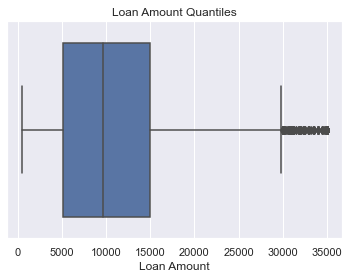

In [1085]:
sns.boxplot(x=df_loan["loan_amnt"] )
plt.title('Loan Amount Quantiles')
plt.xlabel('Loan Amount')
plt.show()

**The loan amount varies from 0 to 30,000 having mean of 10,000. Also there are few outliers above 30,000**

In [1086]:
df_loan["loan_status"].value_counts()

Fully Paid     31258
Charged Off     5347
Current         1054
Name: loan_status, dtype: int64

In [1087]:
df_loan["loan_status"].value_counts()/len(df_loan["loan_status"]) * 100

Fully Paid     83.002735
Charged Off    14.198465
Current         2.798800
Name: loan_status, dtype: float64

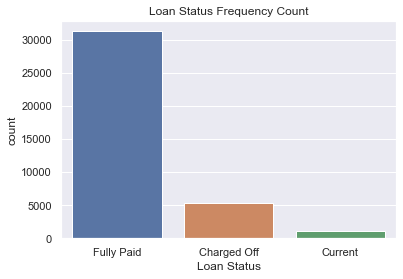

In [1088]:
sns.countplot(x= df_loan["loan_status"])
plt.title('Loan Status Frequency Count')
plt.xlabel('Loan Status')
plt.show()

**Most of the loans are Fully Paid. About 14% of loan are having status as defaulters.**

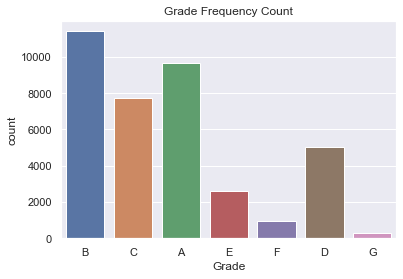

In [1089]:
sns.countplot(x='grade', data=df_loan)
plt.title('Grade Frequency Count')
plt.xlabel('Grade')
plt.show()

**Most of the loans have grade of A followed by B. Therefore stating most of the loans are high graded loans**

Quickly check distribution of annual income & funded amount

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


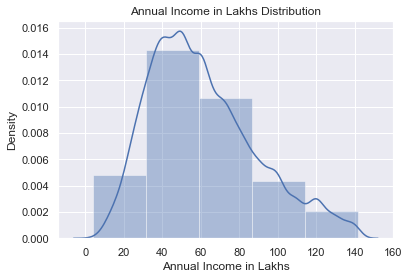

In [1090]:
sns.distplot(df_loan[df_loan['annual_inc'] < 3000]['annual_inc'], bins=5)
plt.title('Annual Income in Lakhs Distribution')
plt.xlabel('Annual Income in Lakhs')
plt.show()

Let's also do our analysis on derive data to get more insite.

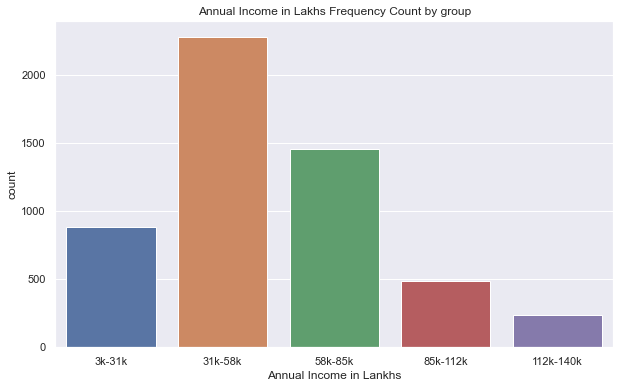

In [1091]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=df_loan[df_loan.loan_status == 'Charged Off'])
plt.title('Annual Income in Lakhs Frequency Count by group')
plt.xlabel('Annual Income in Lankhs')
plt.show()

**Most of the application having highest income range 31K-58K followed by 58K-85K**

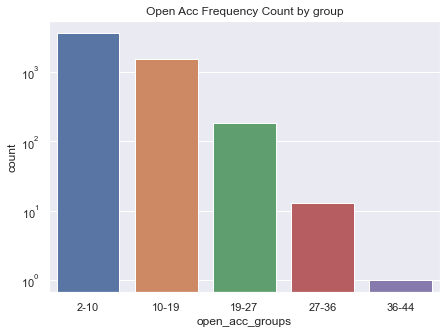

In [1092]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=df_loan[df_loan.loan_status == 'Charged Off'])
plt.title('Open Acc Frequency Count by group')
plt.show()

**Most of the application having highest open acc 2-10 followed by 10-19**

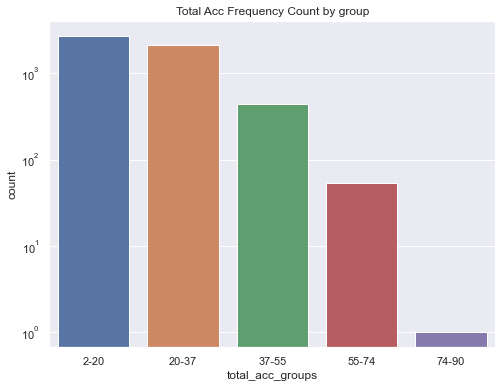

In [1093]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=df_loan[df_loan.loan_status == 'Charged Off'])
plt.title('Total Acc Frequency Count by group')
plt.show()

**Most of the application having highest total acc 2-20 followed by 20-37**

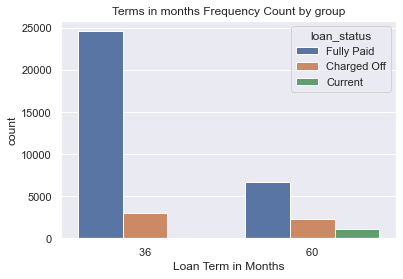

In [1094]:
sns.countplot( x="term_in_months", hue='loan_status', data=df_loan)
plt.title('Terms in months Frequency Count by group')
plt.xlabel('Loan Term in Months')
plt.show()

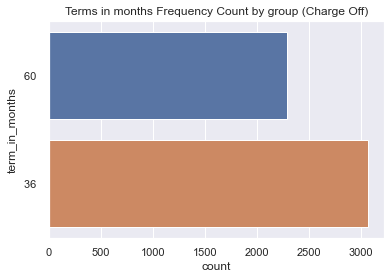

In [1095]:
sns.countplot(y='term_in_months', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Terms in months Frequency Count by group (Charge Off)')
plt.show()

**Tenure of 36 months have have high chances to be defaulters**

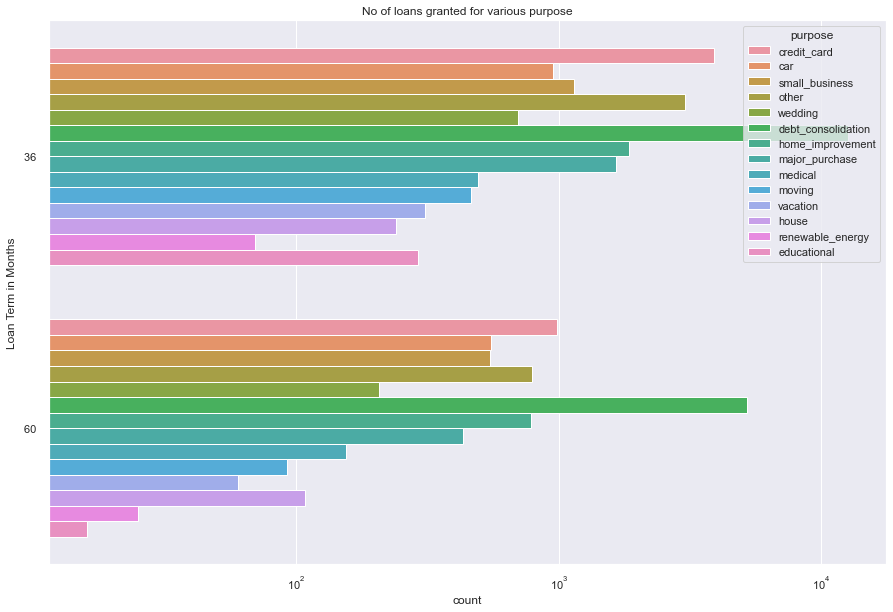

In [1096]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set(xscale = 'log')
sns.countplot(y="term_in_months", hue='purpose', data=df_loan)
plt.ylabel('Loan Term in Months')
plt.title('No of loans granted for various purpose')
plt.show()

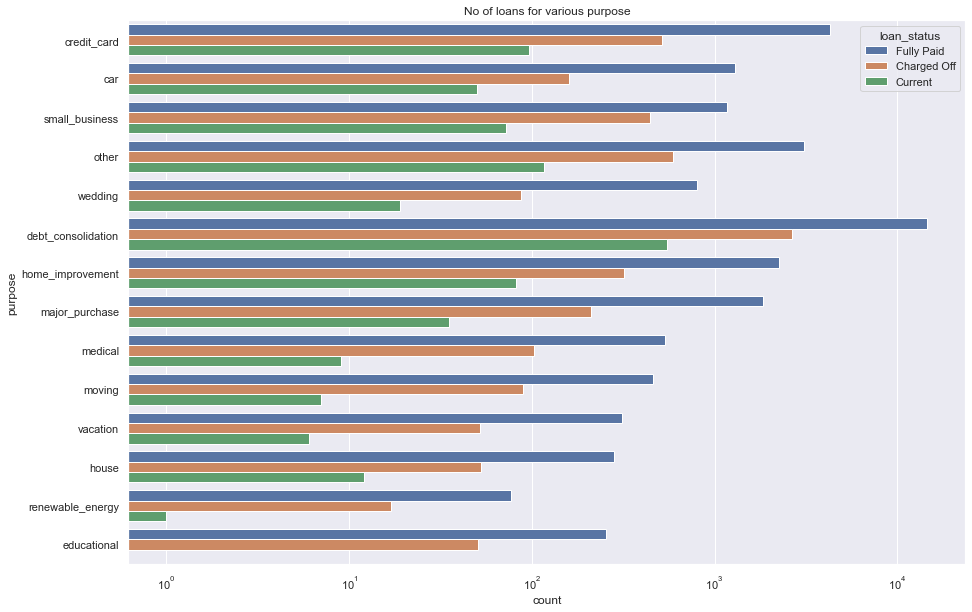

In [1097]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set(xscale = 'log')
sns.countplot(y='purpose', hue='loan_status', data=df_loan)
plt.title('No of loans for various purpose')
plt.show()

**Majority of loan has been given for the debt consolidation purpose having high probability for defaulter's.**

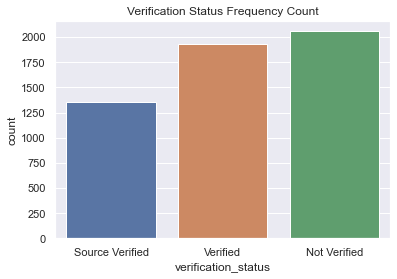

In [1098]:
sns.countplot(x='verification_status', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Verification Status Frequency Count')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


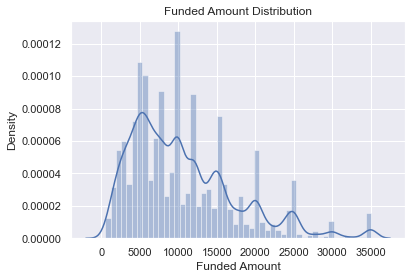

In [1099]:
sns.distplot(df_loan['funded_amnt'])
plt.title('Funded Amount Distribution')
plt.xlabel('Funded Amount')
plt.show()

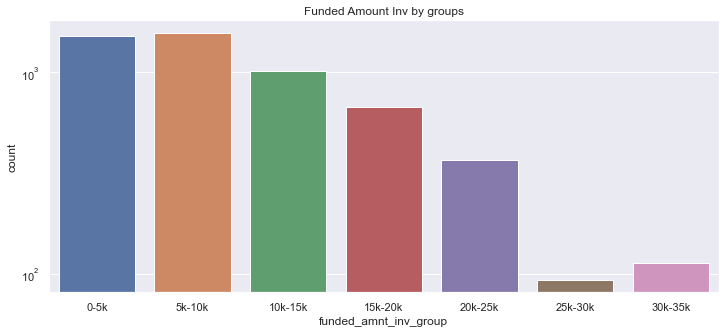

In [1100]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Funded Amount Inv by groups')
plt.show()

**Funded amount is left skewed. Most of the loan amount given is 5K-10K lakhs**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


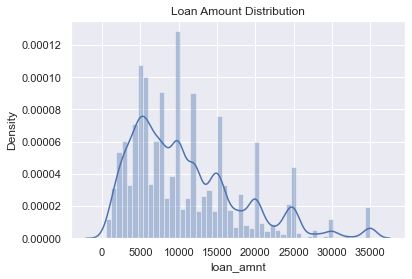

In [1101]:
sns.distplot(df_loan['loan_amnt'])
plt.title('Loan Amount Distribution')
plt.show()

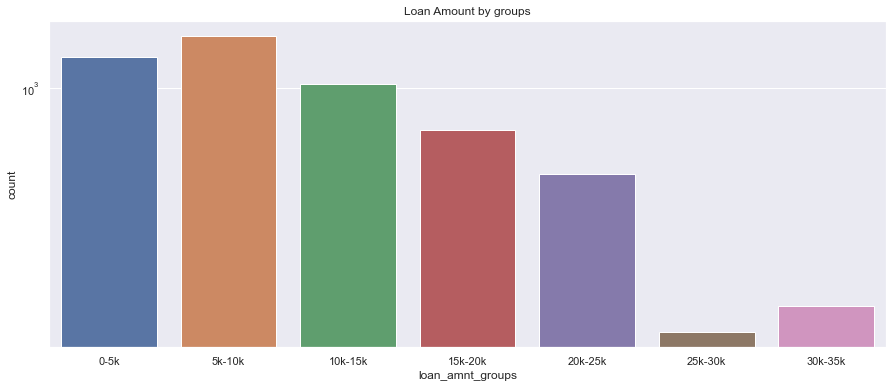

In [1102]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Loan Amount by groups')
plt.show()

**Loan amount is also left skewed. Most of the loan amount given is 5K-10K lakhs**

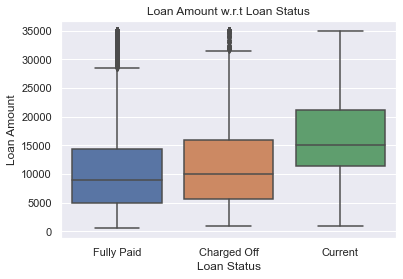

In [1103]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df_loan)
plt.title('Loan Amount w.r.t Loan Status')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.show()

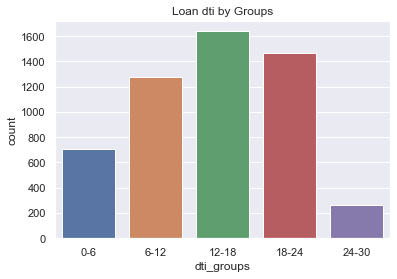

In [1104]:
sns.countplot(x='dti_groups', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Loan dti by Groups')
plt.show()

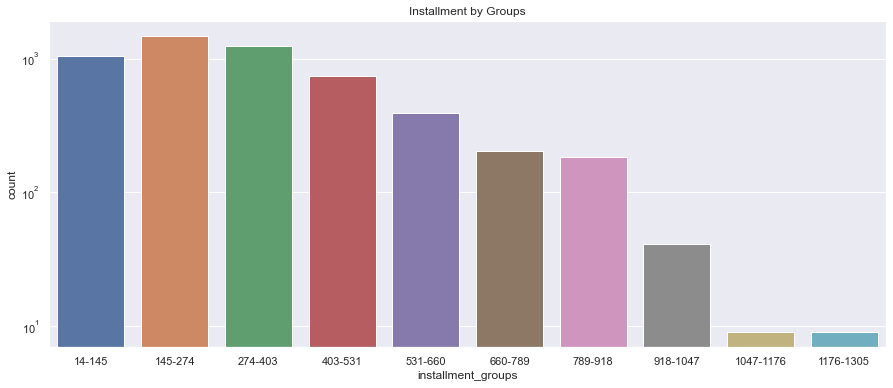

In [1105]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Installment by Groups')
plt.show()

Analyzing by issued month and year

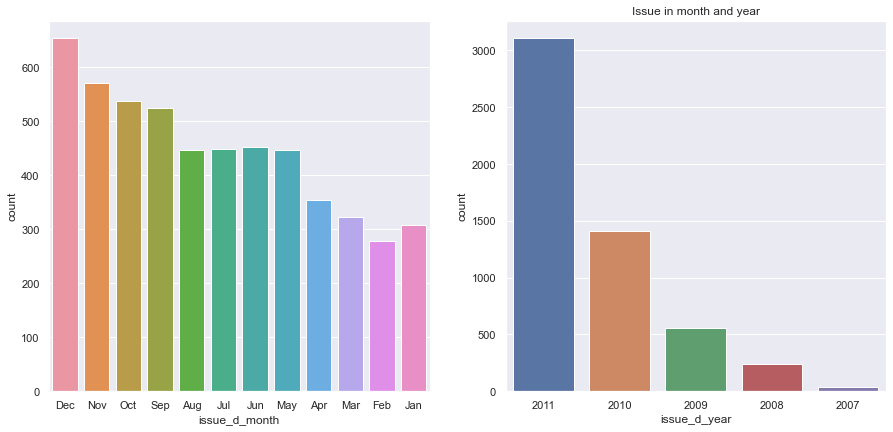

In [1106]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=df_loan[df_loan['loan_status']=='Charged Off'])
plt.title('Issue in month and year')
plt.show()

**Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Also Loan Applicants have been increasing exponentially from year 2007 to 2011**

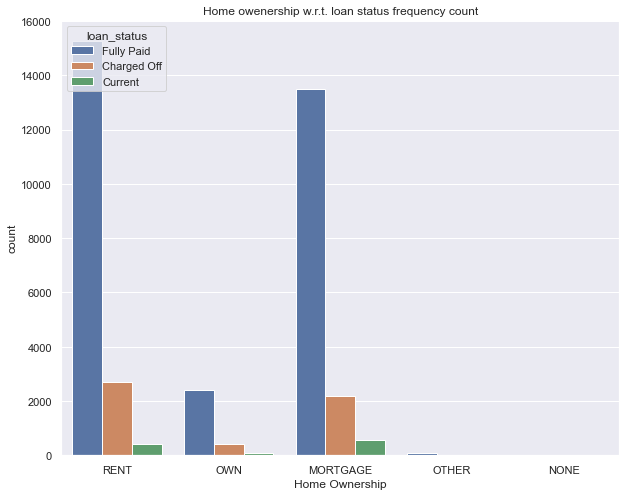

In [1107]:
plt.figure(figsize=(10,8))
sns.countplot(x='home_ownership',hue='loan_status', data=df_loan)
# plt.yticks(rotation=90)
plt.xlabel('Home Ownership')
plt.title('Home owenership w.r.t. loan status frequency count')
plt.show()

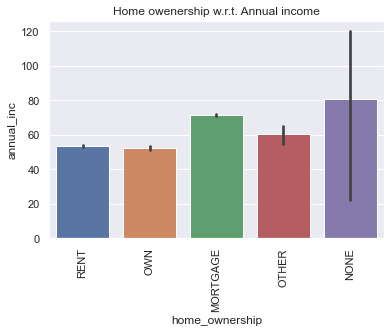

In [1108]:
sns.barplot(y='annual_inc', x='home_ownership', data=df_loan)
plt.xticks(rotation=90)
plt.title('Home owenership w.r.t. Annual income')
plt.show()

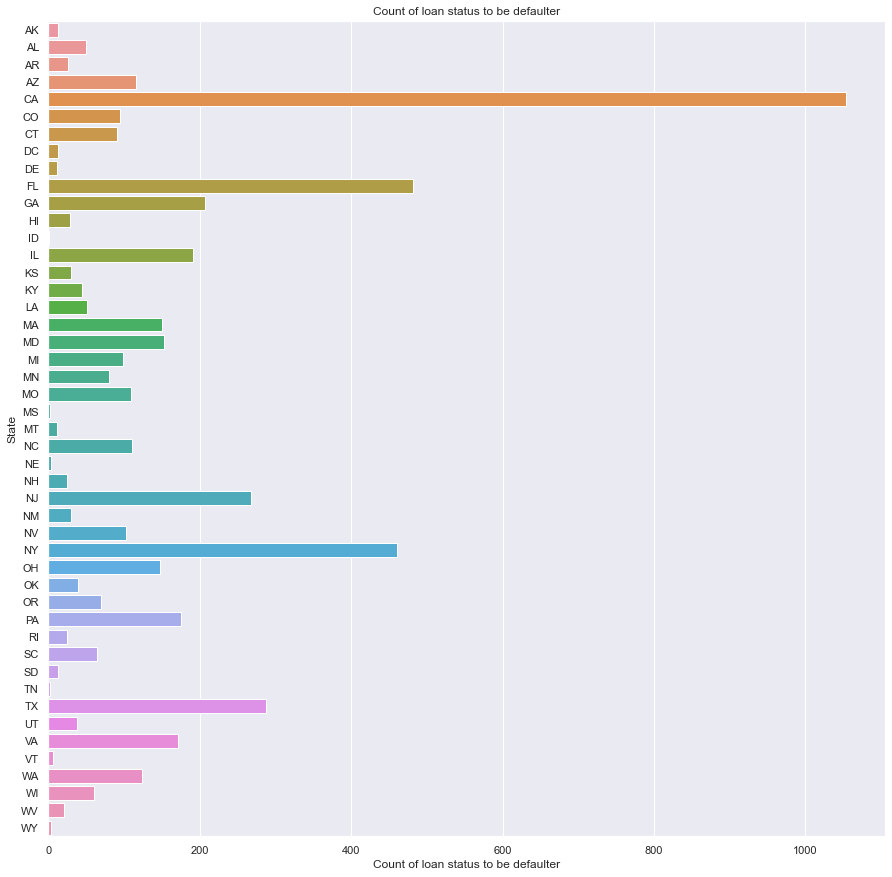

In [1109]:
g = df_loan[df_loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.title('Count of loan status to be defaulter')
plt.show()

nference: Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

Inference: Loan Applicants have been increasing exponentially from year 2007 to 2011

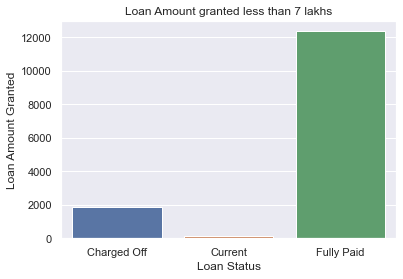

In [1110]:
df_agg = df_loan[df_loan['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

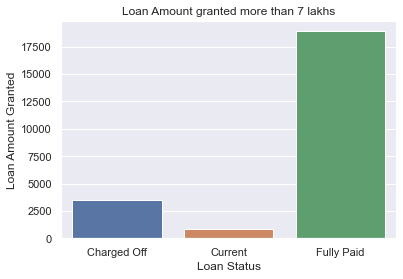

In [1111]:
df_agg = df_loan[df_loan['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

Let's check correlations of values using heap on all dataset & specific dataset

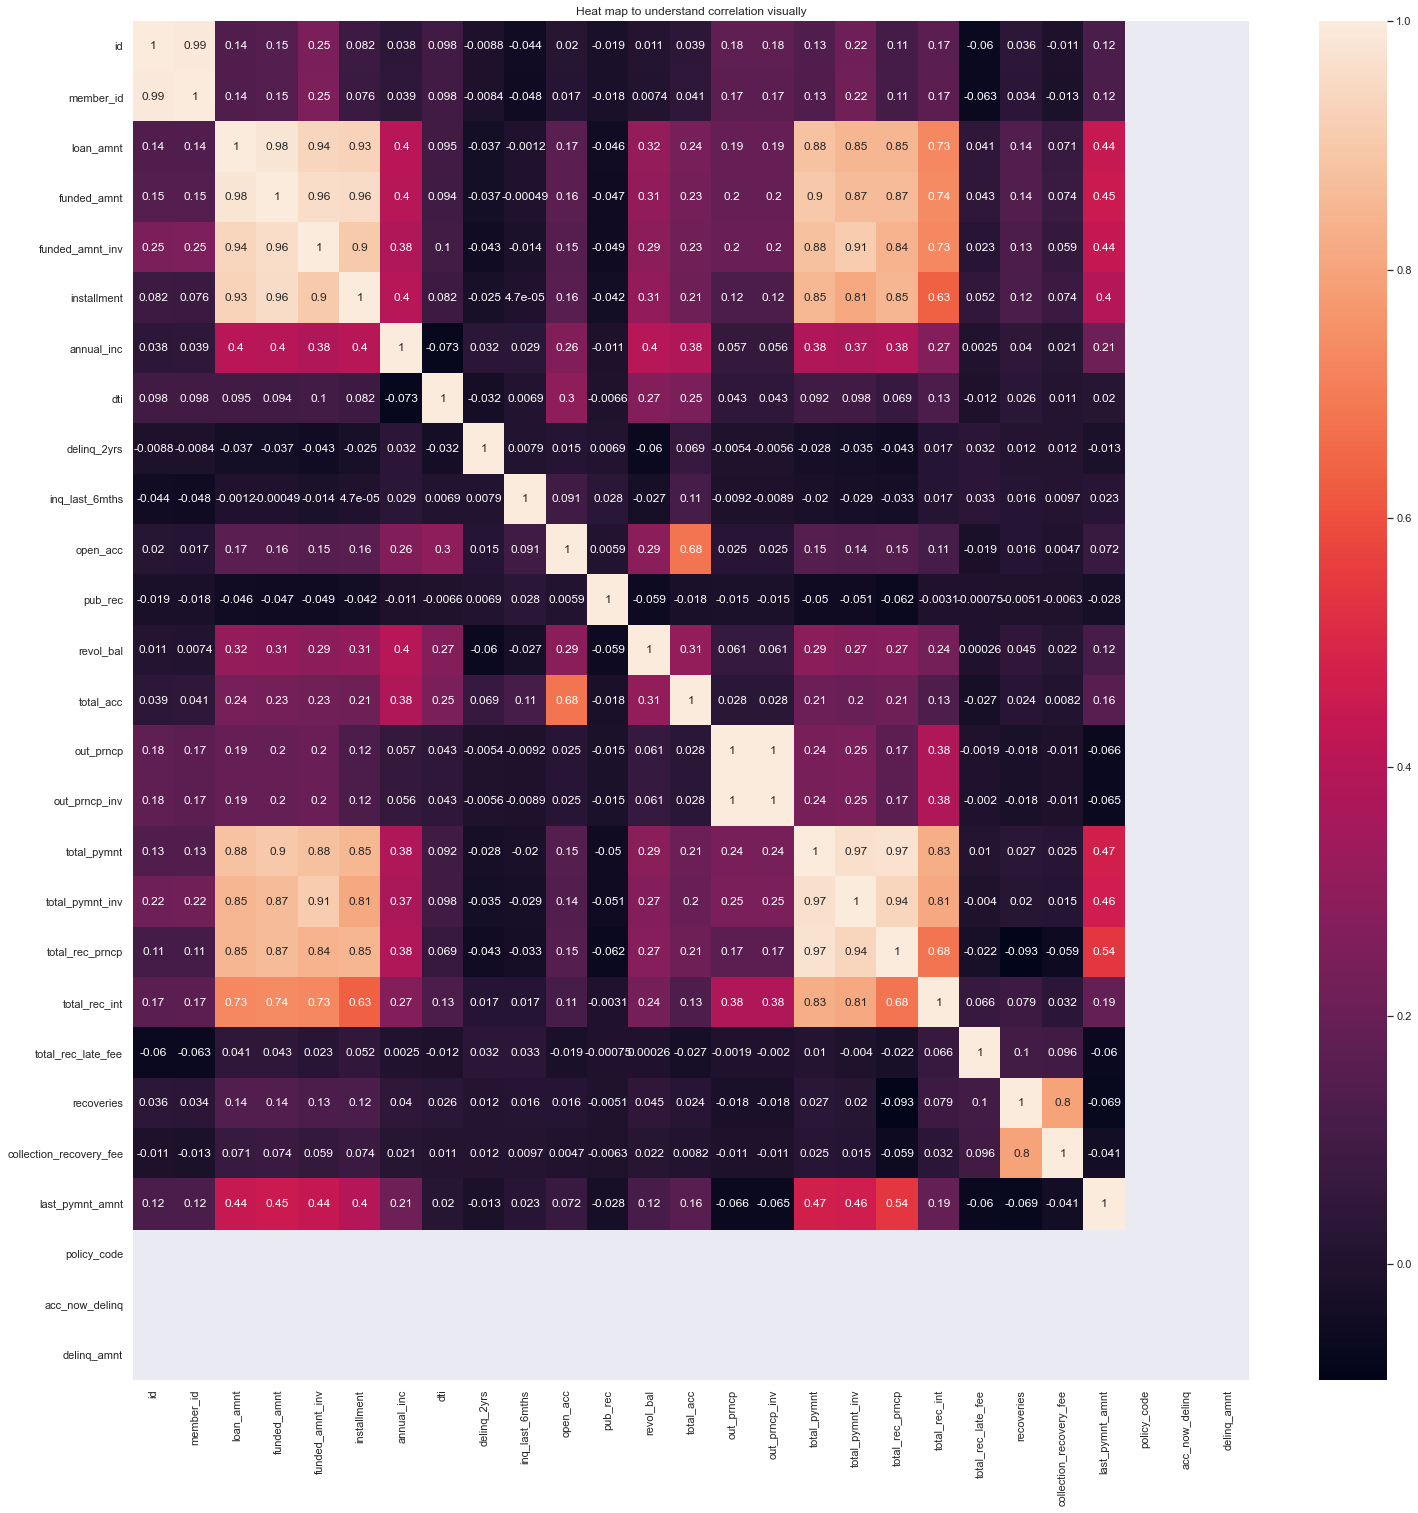

In [1112]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(25,25))
sns.heatmap(df_loan.corr(), annot=True)
plt.title('Heat map to understand correlation visually')
plt.show()

After select specific columns we can get valuable information 

In [1113]:
laons_corr_df = df_loan.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','l_t_ai']) 
cor = laons_corr_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti
loan_amnt,1.000,0.982,0.939,0.929,0.403,0.095
funded_amnt,0.982,1.000,0.957,0.955,0.399,0.094
funded_amnt_inv,0.939,0.957,1.000,0.902,0.382,0.102
installment,0.929,0.955,0.902,1.000,0.399,0.082
annual_inc,0.403,0.399,0.382,0.399,1.000,-0.073
dti,0.095,0.094,0.102,0.082,-0.073,1.000


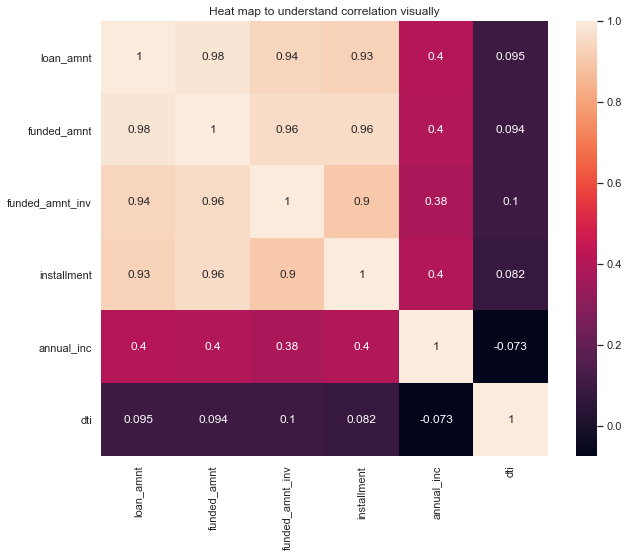

In [1114]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, annot=True)
plt.title('Heat map to understand correlation visually')
plt.show()

# Conclusion 

Based on our analysis there is high probability if applicants taking loan
- **for 'debt consolidation' and have income of 31k -58k**
- **whose home ownership is 'MORTGAGE and have income of 31k -58k**
- **when grade is A and loan amount is between 31k -58k**
- **when dti is between 12-18 and loan amount is between 31k -58k**
- **maximum number of defaults occured when the loan was sanctioned/issued in Dec**

We can see **loan amount & interest rate, installment, repayment term, home ownership, loan purpose, residential state and income group** plays an important role's to decide loan defau